In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

# Display the first few rows of each dataset to understand the structure
print(calendar.head())
print(listings.head())
print(reviews.head())


   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN
        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house 

In [5]:
# Remove dollar signs and commas from price fields
listings['price'] = listings['price'].replace(r'[\$,]', '', regex=True).astype(float)
calendar['price'] = calendar['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Handle missing values by filling them or dropping columns/rows
listings = listings.dropna(subset=['price', 'latitude', 'longitude'])

# Handle missing prices in the calendar dataset (optional, drop them if necessary)
calendar = calendar.dropna(subset=['price'])


In [7]:
# Select features for the price prediction
features = listings[['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'latitude', 'longitude']]

# Convert categorical variable 'room_type' to numerical
features = pd.get_dummies(features, drop_first=True)

# Target variable
target = listings['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Coefficients to understand feature importance
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [9]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Select features for price prediction
features = listings[['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'latitude', 'longitude']]

# Convert categorical variable 'room_type' to numerical
features = pd.get_dummies(features, drop_first=True)

# Target variable
target = listings['price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Coefficients to understand feature importance
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load the dataset
listings = pd.read_csv('listings.csv')

# Data Cleaning - Removing '$' and ',' from price column and converting to float
listings['price'] = listings['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Selecting relevant features for the model
features = ['accommodates', 'bedrooms', 'bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 'review_scores_rating']
X = listings[features]
y = listings['price']

# Handle missing data using imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

# Display the coefficients of the model
coef_df = pd.DataFrame(model.coef_, index=features, columns=['Coefficient'])
print(coef_df)


Root Mean Squared Error: 65.41886898475073
                      Coefficient
accommodates            19.379741
bedrooms                20.255094
bathrooms               28.374705
beds                    -1.729201
minimum_nights           0.037880
maximum_nights          -0.000153
review_scores_rating     0.607012


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (make sure to provide the correct paths)
listings = pd.read_csv('C:/path/to/listings.csv')
calendar = pd.read_csv('C:/path/to/calendar.csv')

# Merge listings with calendar on 'listing_id'
listings_cal = pd.merge(listings[['id', 'neighbourhood_cleansed']], calendar, left_on='id', right_on='listing_id')

# Group by neighborhood and calculate occupancy rates
occupancy_rates = listings_cal.groupby('neighbourhood_cleansed')['available'].apply(lambda x: (x == 'f').mean()).reset_index()
occupancy_rates.columns = ['Neighborhood', 'Occupancy Rate']

# Check the resulting DataFrame
print(occupancy_rates.head())  # Debugging line

# Sort and visualize
occupancy_rates = occupancy_rates.sort_values(by='Occupancy Rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Occupancy Rate', y='Neighborhood', data=occupancy_rates)
plt.title('Occupancy Rates by Neighborhood')
plt.xlim(0, 1)  # Set x-axis limits for clarity
plt.savefig('occupancy_rates_by_neighborhood.png')  # Save the figure
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'C:/path/to/listings.csv'

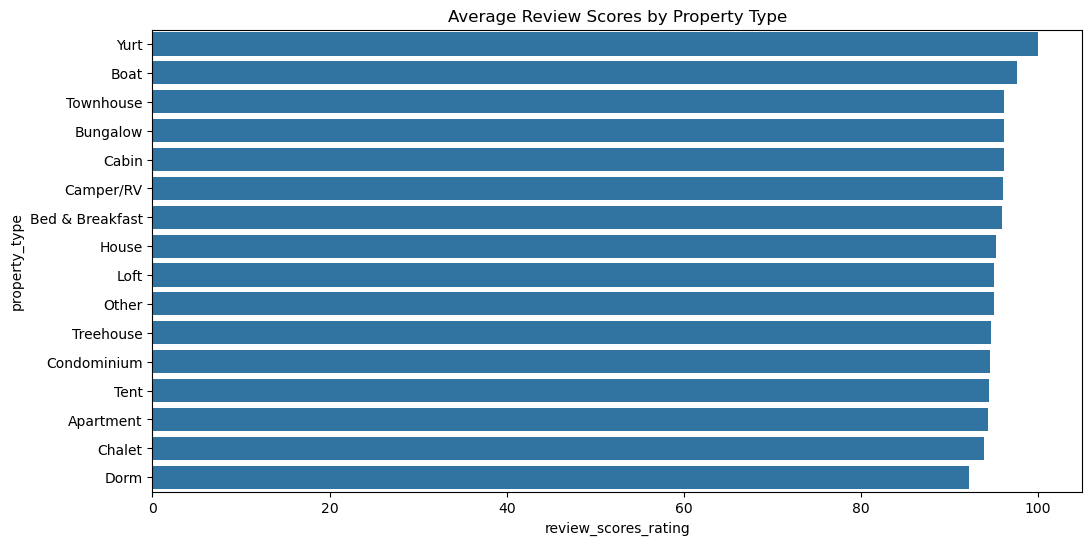

In [19]:
# Merge listings with reviews on 'id' and 'listing_id'
listings_reviews = pd.merge(listings[['id', 'property_type', 'review_scores_rating']], reviews, left_on='id', right_on='listing_id')

# Group by property type and calculate average review scores
review_scores = listings_reviews.groupby('property_type')['review_scores_rating'].mean().reset_index()

# Sort and visualize
review_scores = review_scores.sort_values(by='review_scores_rating', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='review_scores_rating', y='property_type', data=review_scores)
plt.title('Average Review Scores by Property Type')
plt.show()


In [21]:
plt.figure(figsize=(10,6))
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Price Prediction')
plt.show()


NameError: name 'coefficients' is not defined

<Figure size 1000x600 with 0 Axes>

In [23]:
# Store the coefficients in a DataFrame
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Sort by the coefficient value
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

# Plot the coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Price Prediction')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [25]:
# Store the coefficients in a DataFrame
coefficients = pd.DataFrame({
    'Feature': feature_columns,  # Use the original feature columns
    'Coefficient': model.coef_
})

# Sort by the coefficient value
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

# Plot the coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Price Prediction')
plt.show()


NameError: name 'feature_columns' is not defined

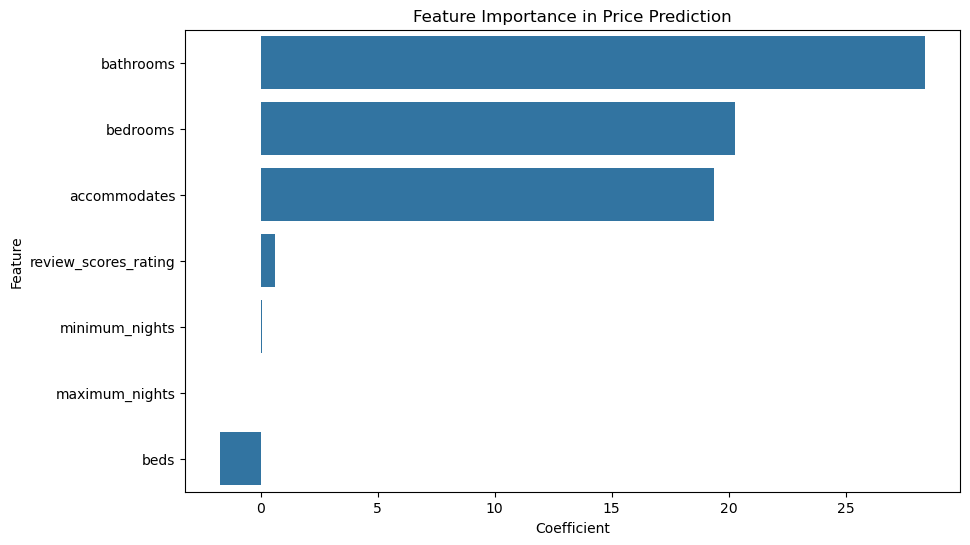

In [27]:
# Define feature columns based on the selected features for your model
feature_columns = ['accommodates', 'bedrooms', 'bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 'review_scores_rating']

# Store the coefficients in a DataFrame
coefficients = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model.coef_
})

# Sort by the coefficient value
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

# Plot the coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Importance in Price Prediction')
plt.show()


In [29]:
cleaned_listings.to_csv('cleaned_listings.csv', index=False)
calendar.to_csv('cleaned_calendar.csv', index=False)
reviews.to_csv('cleaned_reviews.csv', index=False)

NameError: name 'cleaned_listings' is not defined

In [31]:

# Save cleaned DataFrames to new CSV files
cleaned_listings.to_csv('cleaned_listings.csv', index=False)
cleaned_calendar.to_csv('cleaned_calendar.csv', index=False)
cleaned_reviews.to_csv('cleaned_reviews.csv', index=False)

print("Cleaned data has been saved to CSV files.")


NameError: name 'cleaned_listings' is not defined

In [35]:
import pandas as pd

# Load the original datasets
listings = pd.read_csv('listings.csv')

# Clean the data (example cleaning)
cleaned_listings = listings.drop(columns=['last_scraped', 'host_about'])  # Drop unnecessary columns
cleaned_listings['price'] = cleaned_listings['price'].replace(r'[\$,]', '', regex=True).astype(float)  # Clean price column
cleaned_listings = cleaned_listings.dropna(subset=['price', 'latitude', 'longitude'])  # Drop rows with missing values


In [37]:
# Save cleaned DataFrames to new CSV files
cleaned_listings.to_csv('cleaned_listings.csv', index=False)
# Repeat for other cleaned DataFrames
cleaned_calendar.to_csv('cleaned_calendar.csv', index=False)  # Ensure cleaned_calendar is defined
cleaned_reviews.to_csv('cleaned_reviews.csv', index=False)  # Ensure cleaned_reviews is defined

print("Cleaned data has been saved to CSV files.")


NameError: name 'cleaned_calendar' is not defined

In [40]:
import pandas as pd

# Load the datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

# Clean Listings
cleaned_listings = listings.drop(columns=['last_scraped', 'host_about'])  # Drop unnecessary columns
cleaned_listings['price'] = cleaned_listings['price'].replace(r'[\$,]', '', regex=True).astype(float)  # Clean price column
cleaned_listings = cleaned_listings.dropna(subset=['price', 'latitude', 'longitude'])  # Drop rows with missing values

# Clean Calendar
cleaned_calendar = calendar.dropna(subset=['listing_id', 'date'])  # Drop rows with missing listing_id or date

# Clean Reviews
cleaned_reviews = reviews.dropna(subset=['listing_id', 'comments'])  # Drop rows with missing listing_id or comments

# Save cleaned DataFrames
cleaned_listings.to_csv('cleaned_listings.csv', index=False)
cleaned_calendar.to_csv('cleaned_calendar.csv', index=False)
cleaned_reviews.to_csv('cleaned_reviews.csv', index=False)

print("Cleaned data has been saved to CSV files.")


Cleaned data has been saved to CSV files.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example plot
plt.figure(figsize=(10,6))
sns.barplot(x='Occupancy Rate', y='Neighborhood', data=occupancy_rates)
plt.title('Occupancy Rates by Neighborhood')

# Save the figure
plt.savefig('occupancy_rates.png', bbox_inches='tight')  # Adjust format as needed (e.g., .png, .jpg, .pdf)
plt.show()


NameError: name 'occupancy_rates' is not defined

<Figure size 1000x600 with 0 Axes>

In [3]:
import pandas as pd

# Example DataFrame for occupancy rates by neighborhood
data = {
    'Neighborhood': ['Capitol Hill', 'Ballard', 'South Lake Union'],
    'Occupancy Rate': [0.85, 0.78, 0.92]
}

occupancy_rates = pd.DataFrame(data)


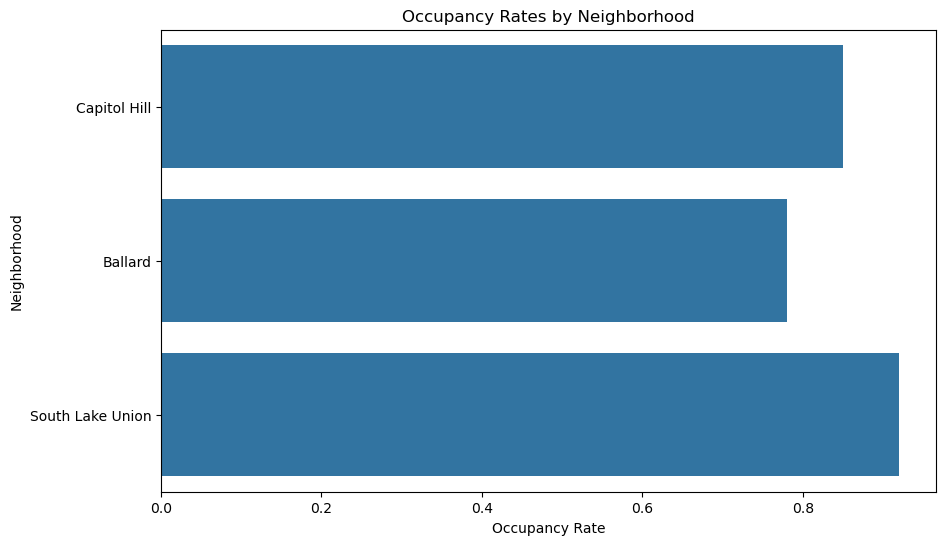

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10,6))
sns.barplot(x='Occupancy Rate', y='Neighborhood', data=occupancy_rates)
plt.title('Occupancy Rates by Neighborhood')

# Save the figure
plt.savefig('occupancy_rates.png', bbox_inches='tight')  # Save as PNG
plt.show()


In [7]:
occupancy_rates = pd.read_csv('path_to_your_data.csv')  # Adjust path as necessary


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_your_data.csv'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'listings' and 'calendar' DataFrames are already defined

# Merge listings with calendar on 'listing_id'
listings_cal = pd.merge(listings[['id', 'neighbourhood_cleansed']], calendar, left_on='id', right_on='listing_id')

# Group by neighborhood and calculate occupancy rates
occupancy_rates = listings_cal.groupby('neighbourhood_cleansed')['available'].apply(lambda x: (x == 'f').mean()).reset_index()
occupancy_rates.columns = ['Neighborhood', 'Occupancy Rate']

# Sort occupancy rates
occupancy_rates = occupancy_rates.sort_values(by='Occupancy Rate', ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupancy Rate', y='Neighborhood', data=occupancy_rates)
plt.title('Occupancy Rates by Neighborhood')

# Save the figure
plt.savefig('occupancy_rates_by_neighborhood.png', bbox_inches='tight')  # Save as PNG
plt.show()


NameError: name 'listings' is not defined

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
listings = pd.read_csv('path/to/listings.csv')  # Replace with your actual path
calendar = pd.read_csv('path/to/calendar.csv')  # Replace with your actual path

# Merge listings with calendar on 'listing_id'
listings_cal = pd.merge(listings[['id', 'neighbourhood_cleansed']], calendar, left_on='id', right_on='listing_id')

# Group by neighborhood and calculate occupancy rates
occupancy_rates = listings_cal.groupby('neighbourhood_cleansed')['available'].apply(lambda x: (x == 'f').mean()).reset_index()
occupancy_rates.columns = ['Neighborhood', 'Occupancy Rate']

# Sort occupancy rates
occupancy_rates = occupancy_rates.sort_values(by='Occupancy Rate', ascending=False)

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Occupancy Rate', y='Neighborhood', data=occupancy_rates)
plt.title('Occupancy Rates by Neighborhood')

# Save the figure
plt.savefig('occupancy_rates_by_neighborhood.png', bbox_inches='tight')  # Save as PNG
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/listings.csv'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load your dataset
df = pd.read_csv('your_file.csv')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Define your features (X) and target (y)
X = df[['column1', 'column2', 'column3']]  # Replace with your feature columns
y = df['target_column']  # Replace with your target column

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Use 'median' or 'most_frequent' if needed
X_imputed = imputer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


FileNotFoundError: [Errno 2] No such file or directory: 'your_file.csv'

In [3]:
df = pd.read_csv('C:/Users/tonia/OneDrive/Υπολογιστής/Miltos/Data Scientist Course 2 Projects/Data Scientist Project 1/your_file.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/tonia/OneDrive/Υπολογιστής/Miltos/Data Scientist Course 2 Projects/Data Scientist Project 1/your_file.csv'

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the datasets
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

# Check for missing values in each DataFrame
print("Missing values in calendar:")
print(calendar.isnull().sum())
print("\nMissing values in listings:")
print(listings.isnull().sum())
print("\nMissing values in reviews:")
print(reviews.isnull().sum())

# Handling missing values in listings as an example
imputer = SimpleImputer(strategy='mean')  # Change strategy as needed
listings[['price', 'number_of_rooms']] = imputer.fit_transform(listings[['price', 'number_of_rooms']])


Missing values in calendar:
listing_id         0
date               0
available          0
price         459028
dtype: int64

Missing values in listings:
id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

Missing values in reviews:
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64


KeyError: "['number_of_rooms'] not in index"

In [7]:
# Replace 'correct_column_name' with the actual name found in the previous step
imputer = SimpleImputer(strategy='mean')  # Change strategy as needed
listings[['price', 'correct_column_name']] = imputer.fit_transform(listings[['price', 'correct_column_name']])



KeyError: "['correct_column_name'] not in index"

In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
listings = pd.read_csv(r"C:/Users/tonia/OneDrive/Υπολογιστής/Miltos/Data Scientist Course 2 Projects/Data Scientist Project 1/listings.csv")

# Check for missing values
missing_values = listings.isnull().sum()
print(missing_values[missing_values > 0])  # Print only columns with missing values

# Handle missing values in price and bedrooms
imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or 'most_frequent'

# Impute missing values for 'price' and 'bedrooms'
listings[['price', 'bedrooms']] = imputer.fit_transform(listings[['price', 'bedrooms']])

# Check for missing values again
missing_values_after = listings.isnull().sum()
print(missing_values_after[missing_values_after > 0])  # Should be empty if handled correctly


summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_verifications                2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                   

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '$85.00'

In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
listings = pd.read_csv(r"C:\Users\tonia\OneDrive\Υπολογιστής\Miltos\Data Scientist Course 2 Projects\Data Scientist Project 1\listings.csv")

# Check for missing values
missing_values = listings.isnull().sum()
print("Missing values before cleaning:")
print(missing_values[missing_values > 0])  # Print only columns with missing values

# Clean the 'price' column: remove '$' and convert to float
listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Handle missing values for 'price' and 'bedrooms'
imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or 'most_frequent'

# Impute missing values for 'price' and 'bedrooms'
listings[['price', 'bedrooms']] = imputer.fit_transform(listings[['price', 'bedrooms']])

# Check for missing values again
missing_values_after = listings.isnull().sum()
print("Missing values after cleaning:")
print(missing_values_after[missing_values_after > 0])  # Should be empty if handled correctly


<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
C:\Users\tonia\AppData\Local\Temp\ipykernel_13492\3629351767.py:13: SyntaxWarning: invalid escape sequence '\$'
  listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


Missing values before cleaning:
summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_verifications                2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                   

In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
listings = pd.read_csv(r"C:\Users\tonia\OneDrive\Υπολογιστής\Miltos\Data Scientist Course 2 Projects\Data Scientist Project 1\listings.csv")

# Check for missing values
missing_values = listings.isnull().sum()
print("Missing values before cleaning:")
print(missing_values[missing_values > 0])  # Print only columns with missing values

# Clean the 'price' column: remove '$' and convert to float
listings['price'] = listings['price'].replace({'$': '', ',': ''}, regex=True).astype(float)

# Handle missing values for 'price' and 'bedrooms'
imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or 'most_frequent'

# Impute missing values for 'price' and 'bedrooms'
listings[['price', 'bedrooms']] = imputer.fit_transform(listings[['price', 'bedrooms']])

# Check for missing values again
missing_values_after = listings.isnull().sum()
print("Missing values after cleaning:")
print(missing_values_after[missing_values_after > 0])  # Should be empty if handled correctly


Missing values before cleaning:
summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_verifications                2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                   

ValueError: could not convert string to float: '$85.00'

In [15]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
listings = pd.read_csv(r"C:\Users\tonia\OneDrive\Υπολογιστής\Miltos\Data Scientist Course 2 Projects\Data Scientist Project 1\listings.csv")

# Check for missing values
missing_values = listings.isnull().sum()
print("Missing values before cleaning:")
print(missing_values[missing_values > 0])  # Print only columns with missing values

# Clean the 'price' column: remove '$' and ',' and convert to float
listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True).str.strip().astype(float)

# Handle missing values for 'price' and 'bedrooms'
imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or 'most_frequent'

# Impute missing values for 'price' and 'bedrooms'
listings[['price', 'bedrooms']] = imputer.fit_transform(listings[['price', 'bedrooms']])

# Check for missing values again
missing_values_after = listings.isnull().sum()
print("Missing values after cleaning:")
print(missing_values_after[missing_values_after > 0])  # Should be empty if handled correctly


<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
C:\Users\tonia\AppData\Local\Temp\ipykernel_13492\1068363019.py:13: SyntaxWarning: invalid escape sequence '\$'
  listings['price'] = listings['price'].replace({'\$': '', ',': ''}, regex=True).str.strip().astype(float)


Missing values before cleaning:
summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_verifications                2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                   

In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load your dataset
listings = pd.read_csv(r"C:\Users\tonia\OneDrive\Υπολογιστής\Miltos\Data Scientist Course 2 Projects\Data Scientist Project 1\listings.csv")

# Check for missing values
missing_values = listings.isnull().sum()
print("Missing values before cleaning:")
print(missing_values[missing_values > 0])  # Print only columns with missing values

# Clean the 'price' column: remove '$' and ',' and convert to float
listings['price'] = listings['price'].replace({'\\$': '', ',': ''}, regex=True).str.strip().astype(float)

# Handle missing values for 'price' and 'bedrooms'
imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or 'most_frequent'

# Impute missing values for 'price' and 'bedrooms'
listings[['price', 'bedrooms']] = imputer.fit_transform(listings[['price', 'bedrooms']])

# Check for missing values again
missing_values_after = listings.isnull().sum()
print("Missing values after cleaning:")
print(missing_values_after[missing_values_after > 0])  # Should be empty if handled correctly


Missing values before cleaning:
summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_verifications                2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                   

In [19]:
# Drop columns with too many missing values
columns_to_drop = ['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
                   'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_about',
                   'cleaning_fee', 'security_deposit', 'first_review', 'last_review', 
                   'license']

listings.drop(columns=columns_to_drop, inplace=True)

# Impute numerical columns with mean or median
numeric_columns = ['bathrooms', 'bedrooms', 'beds', 'square_feet', 
                   'weekly_price', 'monthly_price', 'review_scores_rating', 
                   'review_scores_accuracy', 'review_scores_cleanliness', 
                   'review_scores_checkin', 'review_scores_communication', 
                   'review_scores_location', 'review_scores_value', 'reviews_per_month']

imputer = SimpleImputer(strategy='mean')
listings[numeric_columns] = imputer.fit_transform(listings[numeric_columns])

# Impute categorical columns with the most frequent value
categorical_columns = ['host_response_time', 'neighbourhood', 'zipcode', 'property_type']

for col in categorical_columns:
    listings[col].fillna(listings[col].mode()[0], inplace=True)

# Check for missing values again
missing_values_after = listings.isnull().sum()
print("Missing values after handling:")
print(missing_values_after[missing_values_after > 0])


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '$1,000.00'

In [21]:
# Function to clean numeric columns
def clean_numeric_column(column):
    return column.replace({'\$': '', ',': ''}, regex=True).str.strip().astype(float)

# Clean the relevant numeric columns
numeric_columns = ['bathrooms', 'bedrooms', 'beds', 'square_feet', 
                   'weekly_price', 'monthly_price', 'review_scores_rating', 
                   'review_scores_accuracy', 'review_scores_cleanliness', 
                   'review_scores_checkin', 'review_scores_communication', 
                   'review_scores_location', 'review_scores_value', 'reviews_per_month']

for col in numeric_columns:
    if col in listings.columns:
        listings[col] = clean_numeric_column(listings[col])

# Now apply the imputer
imputer = SimpleImputer(strategy='mean')
listings[numeric_columns] = imputer.fit_transform(listings[numeric_columns])

# Impute categorical columns with the most frequent value
categorical_columns = ['host_response_time', 'neighbourhood', 'zipcode', 'property_type']

for col in categorical_columns:
    if col in listings.columns:
        listings[col].fillna(listings[col].mode()[0], inplace=True)

# Check for missing values again
missing_values_after = listings.isnull().sum()
print("Missing values after handling:")
print(missing_values_after[missing_values_after > 0])


<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\tonia\AppData\Local\Temp\ipykernel_13492\1566803248.py:3: SyntaxWarning: invalid escape sequence '\$'
  return column.replace({'\$': '', ',': ''}, regex=True).str.strip().astype(float)
C:\Users\tonia\AppData\Local\Temp\ipykernel_13492\1566803248.py:3: SyntaxWarning: invalid escape sequence '\$'
  return column.replace({'\$': '', ',': ''}, regex=True).str.strip().astype(float)


AttributeError: Can only use .str accessor with string values!

In [23]:
# Function to clean numeric columns
def clean_numeric_column(column):
    if column.dtype == 'object':  # Check if the column is of type object (string)
        return column.replace({'\$': '', ',': ''}, regex=True).str.strip().astype(float)
    else:
        return column  # Return the column unchanged if it's not of type object

# Clean the relevant numeric columns
numeric_columns = ['bathrooms', 'bedrooms', 'beds', 'square_feet', 
                   'weekly_price', 'monthly_price', 'review_scores_rating', 
                   'review_scores_accuracy', 'review_scores_cleanliness', 
                   'review_scores_checkin', 'review_scores_communication', 
                   'review_scores_location', 'review_scores_value', 'reviews_per_month']

for col in numeric_columns:
    if col in listings.columns:
        listings[col] = clean_numeric_column(listings[col])

# Now apply the imputer
imputer = SimpleImputer(strategy='mean')
listings[numeric_columns] = imputer.fit_transform(listings[numeric_columns])

# Impute categorical columns with the most frequent value
categorical_columns = ['host_response_time', 'neighbourhood', 'zipcode', 'property_type']

for col in categorical_columns:
    if col in listings.columns:
        listings[col].fillna(listings[col].mode()[0], inplace=True)

# Check for missing values again
missing_values_after = listings.isnull().sum()
print("Missing values after handling:")
print(missing_values_after[missing_values_after > 0])


Missing values after handling:
host_name                      2
host_since                     2
host_location                  8
host_response_rate           523
host_acceptance_rate         773
host_is_superhost              2
host_thumbnail_url             2
host_picture_url               2
host_neighbourhood           300
host_listings_count            2
host_total_listings_count      2
host_verifications             2
host_has_profile_pic           2
host_identity_verified         2
dtype: int64


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\tonia\AppData\Local\Temp\ipykernel_13492\2917081616.py:4: SyntaxWarning: invalid escape sequence '\$'
  return column.replace({'\$': '', ',': ''}, regex=True).str.strip().astype(float)
C:\Users\tonia\AppData\Local\Temp\ipykernel_13492\2917081616.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings[col].fillna(listings[col].mode()[0], inplace=True)


In [25]:
# Function to clean numeric columns
def clean_numeric_column(column):
    if column.dtype == 'object':  # Check if the column is of type object (string)
        return column.replace({'$': '', ',': ''}, regex=True).str.strip().astype(float)
    else:
        return column  # Return the column unchanged if it's not of type object

# Clean the relevant numeric columns
numeric_columns = ['bathrooms', 'bedrooms', 'beds', 'square_feet', 
                   'weekly_price', 'monthly_price', 'review_scores_rating', 
                   'review_scores_accuracy', 'review_scores_cleanliness', 
                   'review_scores_checkin', 'review_scores_communication', 
                   'review_scores_location', 'review_scores_value', 'reviews_per_month']

for col in numeric_columns:
    if col in listings.columns:
        listings[col] = clean_numeric_column(listings[col])

# Now apply the imputer
imputer = SimpleImputer(strategy='mean')
listings[numeric_columns] = imputer.fit_transform(listings[numeric_columns])

# Impute categorical columns with the most frequent value
categorical_columns = ['host_response_time', 'neighbourhood', 'zipcode', 'property_type']

for col in categorical_columns:
    if col in listings.columns:
        # Instead of using inplace, reassign the column directly
        listings[col] = listings[col].fillna(listings[col].mode()[0])

# Check for missing values again
missing_values_after = listings.isnull().sum()
print("Missing values after handling:")
print(missing_values_after[missing_values_after > 0])


Missing values after handling:
host_name                      2
host_since                     2
host_location                  8
host_response_rate           523
host_acceptance_rate         773
host_is_superhost              2
host_thumbnail_url             2
host_picture_url               2
host_neighbourhood           300
host_listings_count            2
host_total_listings_count      2
host_verifications             2
host_has_profile_pic           2
host_identity_verified         2
dtype: int64


In [29]:
# Handling missing values for categorical columns
listings['host_response_rate'].fillna(listings['host_response_rate'].mode()[0], inplace=True)
listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].mode()[0], inplace=True)
listings['host_neighbourhood'].fillna(listings['host_neighbourhood'].mode()[0], inplace=True)

# Handling missing values for binary columns
listings['host_is_superhost'].fillna(False, inplace=True)
listings['host_has_profile_pic'].fillna(False, inplace=True)
listings['host_identity_verified'].fillna(False, inplace=True)

# Handling missing values for count columns
listings['host_listings_count'].fillna(0, inplace=True)
listings['host_total_listings_count'].fillna(0, inplace=True)
listings['host_verifications'].fillna(0, inplace=True)

# If necessary, check the remaining missing values
missing_values_after = listings.isnull().sum()
print("Missing values after handling:", missing_values_after[missing_values_after > 0])


Missing values after handling: host_name             2
host_since            2
host_location         8
host_thumbnail_url    2
host_picture_url      2
dtype: int64


C:\Users\tonia\AppData\Local\Temp\ipykernel_13492\4195786641.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings['host_listings_count'].fillna(0, inplace=True)
C:\Users\tonia\AppData\Local\Temp\ipykernel_13492\4195786641.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [31]:
# Handling missing values for categorical columns
listings['host_response_rate'] = listings['host_response_rate'].fillna(listings['host_response_rate'].mode()[0])
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].mode()[0])
listings['host_neighbourhood'] = listings['host_neighbourhood'].fillna(listings['host_neighbourhood'].mode()[0])

# Handling missing values for binary columns
listings['host_is_superhost'] = listings['host_is_superhost'].fillna(False)
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].fillna(False)
listings['host_identity_verified'] = listings['host_identity_verified'].fillna(False)

# Handling missing values for count columns
listings['host_listings_count'] = listings['host_listings_count'].fillna(0)
listings['host_total_listings_count'] = listings['host_total_listings_count'].fillna(0)
listings['host_verifications'] = listings['host_verifications'].fillna(0)

# Check for remaining missing values
missing_values_after = listings.isnull().sum()
print("Missing values after handling:", missing_values_after[missing_values_after > 0])


Missing values after handling: host_name             2
host_since            2
host_location         8
host_thumbnail_url    2
host_picture_url      2
dtype: int64


In [33]:
# Handling missing values for categorical columns
listings['host_response_rate'] = listings['host_response_rate'].fillna(listings['host_response_rate'].mode()[0])
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].mode()[0])
listings['host_neighbourhood'] = listings['host_neighbourhood'].fillna(listings['host_neighbourhood'].mode()[0])

# Handling missing values for binary columns
listings['host_is_superhost'] = listings['host_is_superhost'].fillna(False)
listings['host_has_profile_pic'] = listings['host_has_profile_pic'].fillna(False)
listings['host_identity_verified'] = listings['host_identity_verified'].fillna(False)

# Handling missing values for count columns
listings['host_listings_count'] = listings['host_listings_count'].fillna(0)
listings['host_total_listings_count'] = listings['host_total_listings_count'].fillna(0)
listings['host_verifications'] = listings['host_verifications'].fillna(0)

# Check for remaining missing values
missing_values_after = listings.isnull().sum()
print("Missing values after handling:", missing_values_after[missing_values_after > 0])


Missing values after handling: host_name             2
host_since            2
host_location         8
host_thumbnail_url    2
host_picture_url      2
dtype: int64


In [35]:
# Filling missing values for the remaining columns
listings['host_name'] = listings['host_name'].fillna('Unknown Host')
listings['host_since'] = listings['host_since'].fillna('Not Provided')
listings['host_location'] = listings['host_location'].fillna('Unknown Location')
listings['host_thumbnail_url'] = listings['host_thumbnail_url'].fillna('No Thumbnail Available')
listings['host_picture_url'] = listings['host_picture_url'].fillna('No Picture Available')

# Check for remaining missing values
missing_values_after_handling = listings.isnull().sum()
print("Missing values after handling:", missing_values_after_handling[missing_values_after_handling > 0])


Missing values after handling: Series([], dtype: int64)


In [37]:
# Assuming your DataFrames are named listings, df2, and df3
print("Missing values in listings:")
print(listings.isnull().sum())

print("\nMissing values in df2:")
print(df2.isnull().sum())

print("\nMissing values in df3:")
print(df3.isnull().sum())


Missing values in listings:
id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
name                                0
                                   ..
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
Length: 78, dtype: int64

Missing values in df2:


NameError: name 'df2' is not defined

In [39]:
print("Missing values in listings:")
print(listings.isnull().sum()[listings.isnull().sum() > 0])

print("\nMissing values in df2:")
print(df2.isnull().sum()[df2.isnull().sum() > 0])

print("\nMissing values in df3:")
print(df3.isnull().sum()[df3.isnull().sum() > 0])


Missing values in listings:
Series([], dtype: int64)

Missing values in df2:


NameError: name 'df2' is not defined

In [41]:
print("Missing values in listings:")
print(listings.isnull().sum()[listings.isnull().sum() > 0])


Missing values in listings:
Series([], dtype: int64)


In [43]:
# Check for missing values in the reviews DataFrame
print("Missing values in reviews:")
print(reviews.isnull().sum()[reviews.isnull().sum() > 0])

# Check for missing values in the calendar DataFrame
print("\nMissing values in calendar:")
print(calendar.isnull().sum()[calendar.isnull().sum() > 0])


Missing values in reviews:
comments    18
dtype: int64

Missing values in calendar:
price    459028
dtype: int64


In [45]:
Missing values in reviews:
comments    18
dtype: int64

Missing values in calendar:
price    459028
dtype: int64

SyntaxError: invalid syntax (1218457318.py, line 1)

In [47]:
# Display missing values in reviews
print("Missing values in reviews:")
print(reviews.isnull().sum()[reviews.isnull().sum() > 0])

# Fill missing comments with an empty string
reviews['comments'].fillna('', inplace=True)

# Display missing values in calendar
print("\nMissing values in calendar:")
print(calendar.isnull().sum()[calendar.isnull().sum() > 0])

# Fill missing prices with the median price
calendar['price'].fillna(calendar['price'].median(), inplace=True)


Missing values in reviews:
comments    18
dtype: int64

Missing values in calendar:


C:\Users\tonia\AppData\Local\Temp\ipykernel_13492\3854868533.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews['comments'].fillna('', inplace=True)


price    459028
dtype: int64


TypeError: Cannot convert ['$85.00' '$85.00' nan ... nan nan nan] to numeric

In [49]:
# Remove currency symbols and convert to numeric
calendar['price'] = calendar['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Now fill missing prices with the median price
calendar['price'].fillna(calendar['price'].median(), inplace=True)


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\tonia\AppData\Local\Temp\ipykernel_13492\1251660460.py:2: SyntaxWarning: invalid escape sequence '\$'
  calendar['price'] = calendar['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\tonia\AppData\Local\Temp\ipykernel_13492\1251660460.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  calendar['price'].fillna(calendar['price'].median(), inplace=True)


In [51]:
# Fill missing comments in reviews
reviews['comments'] = reviews['comments'].fillna('')

# Clean and convert price column to numeric
calendar['price'] = calendar['price'].replace({'\\$': '', ',': ''}, regex=True).astype(float)

# Fill missing prices with the median price
calendar['price'] = calendar['price'].fillna(calendar['price'].median())

# Check for remaining missing values
print("Missing values in reviews:")
print(reviews.isnull().sum()[reviews.isnull().sum() > 0])

print("\nMissing values in calendar:")
print(calendar.isnull().sum()[calendar.isnull().sum() > 0])


Missing values in reviews:
Series([], dtype: int64)

Missing values in calendar:
Series([], dtype: int64)
